### Chapter 7 Matplotlibを使ったデータ可視化

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

### 7-3-1 可視化する金融データ

In [4]:
# dir(pd)

In [5]:
# 日付データの設定。freq='T'で１分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。１かー１を発生させる
dn = np.random.randint(2, size=len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（１番目の要素 * ２番目の要素 * 3番目の要素 * …と我が累積されていく）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でリサンプリング
# ohlcメソッドで「open」「high」「low」「close」の４つのデータにする
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

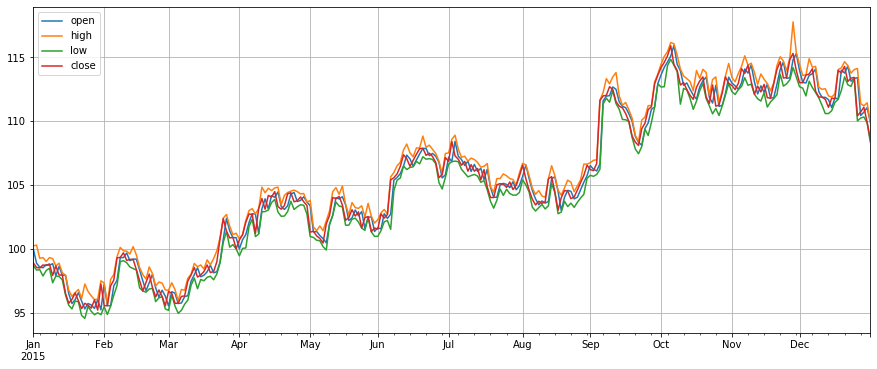

In [6]:
df.plot(figsize=(15, 6), legend='best', grid=True)

In [8]:
# ?pd.Series(rnd_walk, index=idx).resample

#### 7-3-2 ローソクチャートを表示するライブラリ

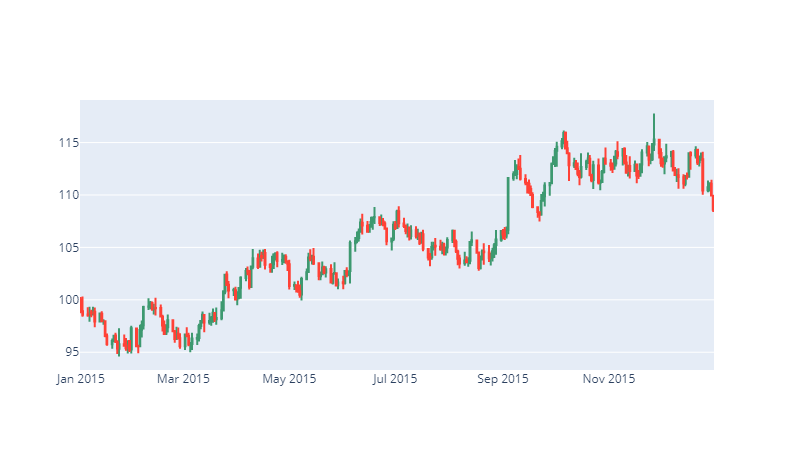

In [10]:
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

# Jupyter notebook用設定
init_notebook_mode(connected=True)

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates=df.index)
iplot(fig)

### 7章 総合問題

In [72]:
file_path = './../../data/raw/dow_jones_index/dow_jones_index.data'

df = pd.read_csv(file_path)
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [73]:
replace_doller_header = [
    'open', 'high', 'low', 'close'
]
for col_name in replace_doller_header:
    df[col_name] = df[col_name].str.replace('$', '')
    df[col_name] = pd.to_numeric(df[col_name])

In [74]:
df.date = pd.to_datetime(df.date)

In [75]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [76]:
df.close.describe()

count    750.000000
mean      53.729267
std       32.788787
min       10.520000
25%       30.365000
50%       45.930000
75%       72.667500
max      170.580000
Name: close, dtype: float64

In [77]:
df[replace_doller_header].describe()

,open,high,low,close
count,750.000000,750.000000,750.000000,750.000000
mean,53.651840,54.669987,52.640160,53.729267
std,32.638852,33.215994,32.119277,32.788787
min,10.590000,10.940000,10.400000,10.520000
25%,29.830000,30.627500,28.720000,30.365000
50%,45.970000,46.885000,44.800000,45.930000
75%,72.715000,74.287500,71.037500,72.667500
max,172.110000,173.540000,167.820000,170.580000


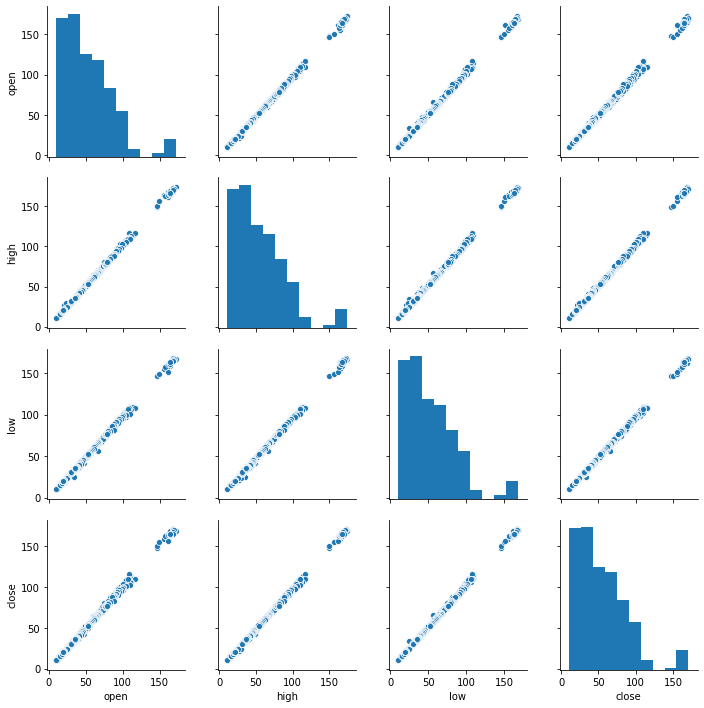

In [78]:
# df[replace_doller_header].pairplot()
sns.pairplot(df[replace_doller_header])

In [79]:
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [92]:
# stock = 'stock'
# df.groupby(stock).describe()

In [93]:
# df_corr = df[['close', stock]].corr()

In [94]:
# print(df_corr)

In [95]:
# df_corr.style.background_gradient(axis=None)

In [96]:
# # df.loc[['close', stock]].corr().style.background_gradient(axis=None)
# df.corr().style.background_gradient(axis=None)

In [97]:
# df.groupby(stock).corr().style.background_gradient(axis=None)

In [98]:
# df.groupby(stock)[['close', stock]].corr().style.background_gradient(axis=None)

In [99]:
# df[df.columns[:8]].corr()

In [58]:
# df[df.columns[:8]].info()

In [59]:
# df[df.columns[:8]].describe()

In [60]:
# df[replace_doller_header]

In [61]:
# df[replace_doller_header].describe()

In [62]:
# df[replace_doller_header].info()

In [63]:
# df[replace_doller_header].corr()

In [101]:
df_stock_index = df.set_index(['date', 'stock'])
df_stock_index.head()

,,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,stock,,,,,,,,,,,,,,
2011-01-07,AA,1,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
2011-01-14,AA,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,AA,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,AA,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,AA,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [102]:
df_stock_index_unstack = df_stock_index.unstack()
df_stock_index_unstack.head()

quarter                                    ...  \
stock           AA AXP BA BAC CAT CSCO CVX DD DIS GE  ...   
date                                                  ...   
2011-01-07       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-14       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-21       1   1  1   1   1    1   1  1   1  1  ...   
2011-01-28       1   1  1   1   1    1   1  1   1  1  ...   
2011-02-04       1   1  1   1   1    1   1  1   1  1  ...   

           percent_return_next_dividend                                        \
stock                               MRK      MSFT      PFE        PG        T   
date                                                                            
2011-01-07                      1.01740  0.559441  1.09051  0.744186  1.49047   
2011-01-14                      1.11014  0.565371  1.09051  0.732489  1.51249   
2011-01-21                      1.12094  0.571021  1.08932  0.804127  1.51783   
2011-01-28                      1.14908  0.576577  1.10193  0.825545  1.56421   
2011-02-04                      1.15537  0.576161  1.03627  0.833202  1.53736   

                                                             
stock            TRV       UTX       VZ       WMT       XOM  
date                                                         
2011-01-07  0.675042  0.543753  1.36376  0.684172  0.582088  
2011-01-14  0.658979  0.543753  1.38184  0.675059  0.565262  
2011-01-21  0.654545  0.536160  1.40200  0.663915  0.557103  
2011-01-28  0.645046  0.528061  1.37525  0.652557  0.557033  
2011-02-04  0.627068  0.521086  1.34949  0.660361  0.528338  

[5 rows x 420 columns]

In [103]:
df_close = df_stock_index_unstack['close']
df_close.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28


In [104]:
df_close.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [105]:
corr_data = df_close.corr()
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


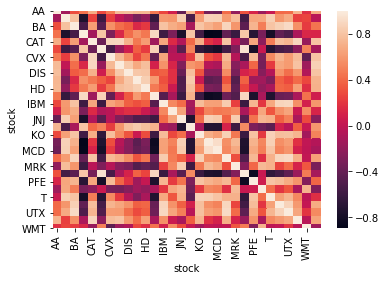

In [106]:
sns.heatmap(corr_data)

In [121]:
# initial value
max_corr = 0
stock_1 = ''
stock_2 = ''

for i in range(0, len(corr_data)):
    print(
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0],
        corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
    )
    if max_corr < corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]:
        max_corr = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]][0]
        stock_1 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[1]
        stock_2 = corr_data[i:i+1].unstack().sort_values(ascending=False)[[1]].idxmax()[0]

# max_coorのペアを出力
print('[Max Corr]:', max_corr)
print('[stock_1]:', stock_1)
print('[stock_2]:', stock_2)

AA DIS 0.7724697655620217
AXP KRFT 0.8735103611554016
BA UTX 0.9163379610743169
BAC HPQ 0.905816768000937
CAT DD 0.9028558103078954
CSCO MSFT 0.9537216645891367
CVX CAT 0.8894156562923723
DD CAT 0.9028558103078954
DIS DD 0.8269258130241479
GE HD 0.8582069310150247
HD GE 0.8582069310150247
HPQ BAC 0.905816768000937
IBM UTX 0.8975523835362526
INTC BA 0.6910939563691997
JNJ KRFT 0.8612879882611022
JPM GE 0.8304508594360389
KO T 0.8689952415835721
KRFT MCD 0.9299213037922904
MCD KRFT 0.9299213037922904
MMM UTX 0.9136955626526879
MRK JNJ 0.8440270438854454
MSFT CSCO 0.9537216645891367
PFE T 0.8065439446754139
PG MRK 0.7497131367292446
T KO 0.8689952415835721
TRV MMM 0.8917262016156647
UTX BA 0.9163379610743169
VZ CAT 0.8903147891825166
WMT PG 0.7237055485083298
XOM DD 0.8635107559399798
[Max Corr]: 0.9537216645891367
[stock_1]: CSCO
[stock_2]: MSFT


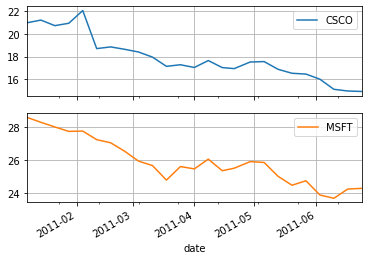

In [123]:
# 380
df_subsets = df_close[[stock_1, stock_2]]
df_subsets.plot(subplots=True, grid=True)
plt.grid(True)

In [124]:
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [130]:
df_index = df.set_index(['date', 'stock']).unstack()
df_index['close'].head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28


In [133]:
df_index_mean = df_index['close'].rolling(5).mean()
df_index_mean.head(20)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-11,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-18,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-25,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-03-04,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204


In [136]:
df_index_mean.shift(-1)

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,16.290,44.858,70.348,14.328,95.152,21.176,93.656,50.146,39.608,19.550,...,34.288,28.088,18.498,64.750,28.214,55.236,80.462,35.656,55.470,78.936
2011-02-04,16.480,45.336,70.900,14.432,97.114,20.722,94.708,51.110,40.400,20.130,...,33.432,27.818,18.596,64.796,28.138,56.368,81.686,35.748,55.792,80.382
2011-02-11,16.742,45.192,71.494,14.332,99.484,20.250,95.886,52.346,41.254,20.654,...,33.156,27.570,18.766,64.550,28.166,57.626,82.872,35.980,55.906,81.714
2011-02-18,16.920,44.698,71.618,14.322,101.334,19.834,97.550,53.490,41.896,20.870,...,32.814,27.276,18.866,63.936,28.126,58.546,83.506,36.184,55.110,82.986
2011-02-25,17.010,44.670,72.132,14.426,102.806,19.328,99.626,54.206,42.836,20.904,...,32.812,26.916,19.168,63.502,28.212,59.220,83.792,36.274,54.184,84.204
2011-03-04,16.788,44.762,72.184,14.444,102.892,18.508,100.190,54.280,43.280,20.864,...,32.780,26.498,19.202,63.078,28.310,59.514,83.544,36.182,53.496,83.972


In [137]:
df_log_ave = (df_index_mean - df_index_mean.shift(-1)) / df_index_mean
df_log_ave.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2011-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-04,-0.011664,-0.010656,-0.007847,-0.007259,-0.02062,0.021439,-0.011233,-0.019224,-0.019996,-0.029668,...,0.024965,0.009613,-0.005298,-0.00071,0.002694,-0.020494,-0.015212,-0.00258,-0.005805,-0.018319


In [142]:
# df_log_ave.describe()[:, ['std']]
df_log_ave.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.002319,-0.004478,-0.002582,0.013105,-0.002445,0.015423,-0.003443,-0.000764,0.000682,0.002379,...,-0.001789,0.007431,-0.005037,-0.000018,-0.004261,-0.003621,-0.002343,-0.000227,0.001984,-0.000647
std,0.012912,0.010725,0.010926,0.010364,0.015423,0.011496,0.011770,0.013361,0.013446,0.013596,...,0.012429,0.007025,0.007032,0.009147,0.008353,0.011537,0.010200,0.007253,0.009722,0.010682
min,-0.016090,-0.020677,-0.017489,-0.007262,-0.024404,-0.006034,-0.021281,-0.024183,-0.022437,-0.029668,...,-0.020136,-0.005654,-0.016008,-0.015523,-0.019403,-0.022318,-0.016632,-0.013810,-0.011792,-0.018319
25%,-0.009709,-0.013045,-0.009469,0.008664,-0.013671,0.007861,-0.012161,-0.010002,-0.006300,-0.002967,...,-0.012229,0.002214,-0.010653,-0.008808,-0.007135,-0.011697,-0.009331,-0.005682,-0.005948,-0.010980
50%,0.002683,-0.005165,-0.004302,0.016362,-0.004607,0.017516,-0.007823,0.000324,0.000801,0.003236,...,0.000386,0.008199,-0.005313,0.001072,-0.003266,-0.004040,-0.004731,-0.000600,-0.001632,0.002431
75%,0.012907,0.003377,0.001565,0.020541,0.006888,0.021774,0.007511,0.008103,0.008806,0.015026,...,0.007372,0.011605,-0.000855,0.006705,0.002772,0.003979,0.004576,0.004383,0.010901,0.006611
max,0.029368,0.011528,0.017075,0.025802,0.026451,0.042425,0.016215,0.024107,0.022031,0.019939,...,0.024965,0.018492,0.006377,0.014526,0.005900,0.018439,0.014957,0.011550,0.016803,0.016356


In [160]:
# df_log_ave.describe().at['count']

In [161]:
# type(df_log_ave.describe().loc['std'])

In [162]:
# # df_log_ave.describe()[['std']]
# df_log_ave.describe().at['std']

In [154]:
for vol_std in df_log_ave.describe().loc['std']:
    print(vol_std)

0.012911878967667732
0.010724547880905171
0.010925814573007418
0.010364019993446027
0.015423485635643575
0.011496143135531869
0.011769929793898798
0.01336115577118952
0.013445579695054811
0.013595941595986484
0.009474739508147291
0.013394723686767415
0.00863268127657279
0.019146724907422672
0.010569592551323495
0.009822824027889726
0.006666095463974586
0.007127699186269513
0.0054099891220649645
0.007816023749549959
0.012428926829407612
0.007024709821057838
0.007031877040167099
0.009146970519591029
0.008353179301741672
0.011537277517165864
0.010199871472006156
0.0072526657692735955
0.009721574201382793
0.010682479943537894


### 総合問題7-2 マーケティング分析

In [186]:
file_path = './../../data/raw/OnlineRetail/Online Retail.csv'
df = pd.read_csv(file_path)

In [187]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [189]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [190]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [191]:
t_col_name = 'CustomerID'
len(df[t_col_name].isnull()), len(df[t_col_name])

(541909, 541909)

In [192]:
len(df[t_col_name].dropna())

406829

In [193]:
# ?df.dropna

In [195]:
df = df.loc[df[t_col_name].dropna().index].copy(deep=False)

In [196]:
len(df)

406829

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [198]:
type(df)

pandas.core.frame.DataFrame

In [199]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


In [206]:
t_col_name = 'InvoiceNo'
# ~df[t_col_name].str.startswith('C')
# len(df[df[t_col_name].str.startswith('C')])
df = df[~df[t_col_name].str.startswith('C')]

In [207]:
len(df)

397924

In [208]:
len(df['CustomerID'].unique()), len(df['InvoiceNo'].unique()), len(df['StockCode'].unique())

(4339, 18536, 3665)

In [209]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [210]:
df.groupby('Country').apply(lambda x: (x.UnitPrice * x.Quantity))

Country            
Australia    197       51.00
             198       39.60
             199       15.00
             200       32.70
             201       25.40
                       ...  
Unspecified  308810    16.95
             308811    20.28
             308812    16.50
             308813    13.30
             308814    16.60
Length: 397924, dtype: float64

In [216]:
def aply_func(x):
    return x.UnitPrice * x.Quantity

g_df = df.groupby('Country').apply(aply_func).sort_values(ascending=False)

In [220]:
g_df.head()

Country               
United Kingdom  540421    168469.60
                61619      77183.60
                222680     38970.00
                173382      8142.75
                348325      7144.72
dtype: float64

In [221]:
g_df[1]

77183.6

In [224]:
# df.Country
# g_df = df.apply(aply_func)

In [228]:
# pd.DataFrame(g_df).unstack()
pd.DataFrame(g_df).unstack().sum(axis=1).sort_values(ascending=False)

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [301]:
file_path = './../../data/raw/OnlineRetail/Online Retail.csv'
df = pd.read_csv(file_path)

target_country = [
    'United Kingdom',
    'Netherlands',
    'EIRE',
    'Germany',
    'France'
]
# df.columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(len(df[df['Country'].isin(target_country)]))
target_country_df = df[df['Country'].isin(target_country)]
# df_index = target_country_df.set_index(['InvoiceDate', 'Country'])
# df_index = target_country_df.set_index(['Country', 'InvoiceDate'])
# df_index = target_country_df.set_index(['InvoiceDate'])
# df_columns = df_index.columns
t_columns = 'calc'
# df_index[t_columns] = df_index['Quantity'] * df_index['UnitPrice']
# df_index.head()
target_country_df[t_columns] = target_country_df['Quantity'] * target_country_df['UnitPrice']
target_country_df[['InvoiceDate', 'Country', t_columns]].head()

524097


,InvoiceDate,Country,calc
0,2010-12-01 08:26:00,United Kingdom,15.30
1,2010-12-01 08:26:00,United Kingdom,20.34
2,2010-12-01 08:26:00,United Kingdom,22.00
3,2010-12-01 08:26:00,United Kingdom,20.34
4,2010-12-01 08:26:00,United Kingdom,20.34


In [303]:
# df[['InvoiceDate', 'Country', t_columns]].groupby(['InvoiceDate', 'Country']).sum().sort_values(ascending=False)

# df[['InvoiceDate', 'Country', t_columns]].groupby(['InvoiceDate', 'Country']).mean()
# df[['InvoiceDate', 'Country', t_columns]].groupby(['InvoiceDate', 'Country']).sum()
# df[['InvoiceDate', 'Country', t_columns]].groupby(['InvoiceDate', 'Country']).resample('M').sum()
# df[['InvoiceDate', 'Country', t_columns]].resample('M').groupby(['InvoiceDate', 'Country']).sum()
# g_df = df[['InvoiceDate', 'Country', t_columns]].groupby(['InvoiceDate', 'Country']).sum()
g_df = target_country_df[['InvoiceDate', 'Country', t_columns]].groupby(['InvoiceDate', 'Country']).sum()
g_df.head()

,,calc
InvoiceDate,Country,
2010-12-01 08:26:00,United Kingdom,139.12
2010-12-01 08:28:00,United Kingdom,22.20
2010-12-01 08:34:00,United Kingdom,348.78
2010-12-01 08:35:00,United Kingdom,17.85
2010-12-01 08:45:00,France,855.86


In [307]:
# g_df.unstack()
# g_df.unstack().resample('M')
g_df_month = g_df.unstack().resample('M').sum()
g_df_month

calc                                               
Country          EIRE    France   Germany Netherlands United Kingdom
InvoiceDate                                                         
2010-12-31    9029.95   9575.36  14562.84     8784.48     676742.620
2011-01-31   21656.52  17503.07  16451.43    26611.16     434308.300
2011-02-28    9674.14   8438.91   8969.24    22932.11     408247.910
2011-03-31   18783.23  14516.90  14170.02    22416.49     559707.390
2011-04-30    7570.50   4195.21  11963.37     2976.56     442254.041
2011-05-31   17921.35  17527.08  25571.35    29185.88     596459.860
2011-06-30   20060.25  15991.87  13081.02    26843.09     554478.350
2011-07-31   42740.65   9888.99  15721.66       26.02     565479.841
2011-08-31   12157.47  13789.26  19023.65    39655.81     539130.500
2011-09-30   42639.05  23198.87  17720.31    26937.26     862018.152
2011-10-31   23307.62  25032.04  30614.27    40708.65     877438.190
2011-11-30   30413.05  30697.51  26044.35    25856.01    1282805.780
2011-12-31    7323.04   7048.83   7804.70    11728.02     388735.430

In [281]:
# df_index.drop(df_columns, axis=1, inplace=True)
# df_index.head()

In [282]:
# # df_index = df_index.unstack()
# # df_index['Country'] = df_index.index
# df_index.index

In [283]:
# df_index.head()

In [284]:
# df_index.info()

In [285]:
# print(len(df[df['Country'].isin(target_country)]))
# target_country_df = df[df['Country'].isin(target_country)]
# target_country_df.head()

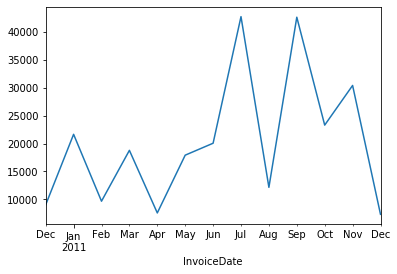

In [314]:
g_df_month_columns = g_df_month.columns
idx = 0
g_df_month[g_df_month_columns[idx]].plot()

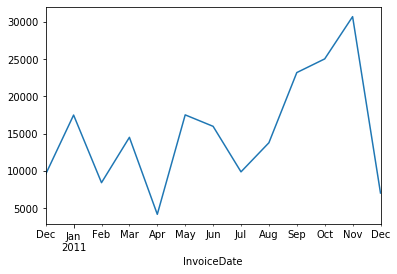

In [315]:
idx = 1
g_df_month[g_df_month_columns[idx]].plot()

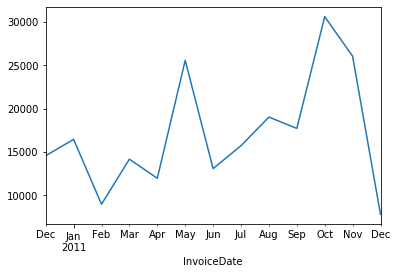

In [316]:
idx = 2
g_df_month[g_df_month_columns[idx]].plot()

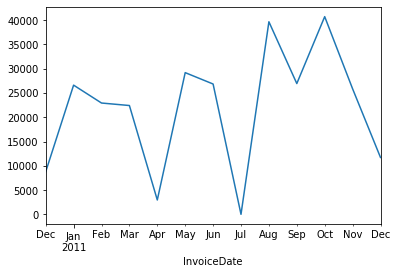

In [317]:
idx = 3
g_df_month[g_df_month_columns[idx]].plot()

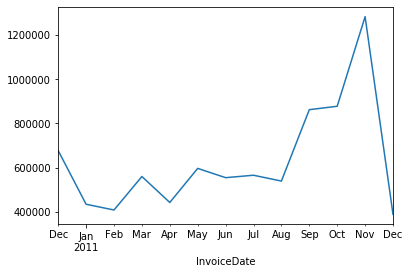

In [318]:
idx = 4
g_df_month[g_df_month_columns[idx]].plot()

In [339]:
file_path = './../../data/raw/OnlineRetail/Online Retail.csv'
df = pd.read_csv(file_path)

target_country = [
    'United Kingdom',
    'Netherlands',
    'EIRE',
    'Germany',
    'France'
]
# df.columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df.columns)
print(len(df[df['Country'].isin(target_country)]))
target_country_df = df[df['Country'].isin(target_country)]
t_columns = 'calc'
target_country_df[t_columns] = target_country_df['Quantity'] * target_country_df['UnitPrice']
target_columns = ['InvoiceDate', 'Country', t_columns, 'Description']
# target_country_df[target_columns].head()

# g_df = target_country_df[target_columns].groupby(['InvoiceDate', 'Country', 'Description']).sum()
g_df = target_country_df[target_columns].groupby(['Country', 'Description']).sum()
# def apply_func(x):
#     return x['Description']
# g_df = target_country_df[
#     target_columns
# ].groupby(
#     ['InvoiceDate', 'Country']
# ).agg({t_columns: np.sum, 'Description': apply_func})
g_df.head()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
524097


calc
Country Description                          
EIRE     4 PURPLE FLOCK DINNER CANDLES  15.30
         50'S CHRISTMAS GIFT BAG LARGE  60.00
         DOLLY GIRL BEAKER              30.00
         NINE DRAWER OFFICE TIDY        29.90
         OVAL WALL MIRROR DIAMANTE      69.65

In [340]:
# dir(g_df)

In [341]:
g_df2 = g_df.sort_values('calc')
g_df2.reset_index(inplace=True)
g_df2

,Country,Description,calc
0,United Kingdom,AMAZON FEE,-221520.500
1,United Kingdom,Manual,-65139.640
2,United Kingdom,Adjust bad debt,-11062.060
3,United Kingdom,CRUK Commission,-7933.430
4,United Kingdom,Bank Charges,-7175.639
...,...,...,...
10297,United Kingdom,JUMBO BAG RED RETROSPOT,84516.440
10298,United Kingdom,PARTY BUNTING,92501.730
10299,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.070
10300,United Kingdom,REGENCY CAKESTAND 3 TIER,134405.940


In [343]:
g_df2.groupby(['Country']).agg({'calc': np.max, 'Description': np.max})

,calc,Description
Country,,
EIRE,7442.85,ZINC WIRE SWEETHEART LETTER TRAY
France,15065.00,ZINC T-LIGHT HOLDER STARS SMALL
Germany,20821.00,ZINC WILLIE WINKIE CANDLE STICK
Netherlands,9568.48,ZINC WILLIE WINKIE CANDLE STICK
United Kingdom,206245.48,wrongly sold sets
